# Model Evaluation and Improvement

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.datasets import load_iris

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles


In [2]:
cf_df = pd.read_excel('data/crowdfunding_ex.xlsx')

In [3]:
cf_df.rename(columns={'보상수': '#ofRewards'}, inplace=True)
cf_df['Success'] = cf_df['Goal'] <= cf_df['Funded']

In [4]:
x_df =  cf_df[["Backers", "CountryCode", "VideoCount", "ImageCount", "TagCode", "Goal", "Period", "SNS", 
               "Fiends" , "#ofCreation", "#ofRewards"]]
y = cf_df['Success']

In [5]:
y.value_counts()

False    549
True     218
Name: Success, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y, random_state=0)

In [7]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

Test set score: 0.81


In [8]:
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

logreg score: 0.83


# Confusion Matrix

In [9]:
confusion = confusion_matrix(y_test, pred_tree)
print("counfusion matrix:\n", confusion)

counfusion matrix:
 [[126  12]
 [ 25  29]]


In [10]:
confusion = confusion_matrix(y_test, pred_logreg)
print("counfusion matrix:\n", confusion)

counfusion matrix:
 [[129   9]
 [ 23  31]]


In [11]:
y_test.value_counts() # 1 is "success" and 2 is "fail"

False    138
True      54
Name: Success, dtype: int64

In [12]:
def target_class_change(value: bool):
    return int(value)

In [13]:
cf_df['Success_target'] = cf_df['Success'].apply(target_class_change)
y = cf_df['Success_target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y, random_state=0)
y_test.value_counts()

0    138
1     54
Name: Success_target, dtype: int64

In [15]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

confusion = confusion_matrix(y_test, pred_tree)
print("counfusion matrix:\n", confusion)

Test set score: 0.86
counfusion matrix:
 [[120  18]
 [  9  45]]


In [16]:
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)

pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

confusion = confusion_matrix(y_test, pred_logreg)
print("counfusion matrix:\n", confusion)

logreg score: 0.83
counfusion matrix:
 [[129   9]
 [ 23  31]]


## plot_confusioin_matrix

<function matplotlib.pyplot.show(close=None, block=None)>

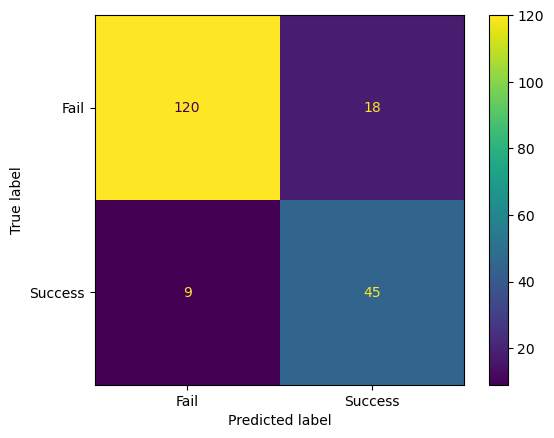

In [17]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, display_labels=['Fail', 'Success'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

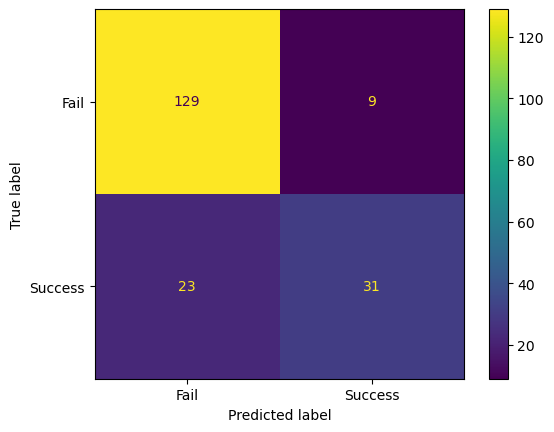

In [18]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['Fail', 'Success'])
plt.show

# Classification Report

In [19]:
print(classification_report(y_test, pred_tree))
print()
print(classification_report(y_test, pred_logreg, target_names=["Fail", "Success"]))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       138
           1       0.71      0.83      0.77        54

    accuracy                           0.86       192
   macro avg       0.82      0.85      0.83       192
weighted avg       0.87      0.86      0.86       192


              precision    recall  f1-score   support

        Fail       0.85      0.93      0.89       138
     Success       0.78      0.57      0.66        54

    accuracy                           0.83       192
   macro avg       0.81      0.75      0.77       192
weighted avg       0.83      0.83      0.82       192



# Precision-recall Curve and ROC Curves

In [20]:
tree.predict_proba(X_test)

array([[0.88135593, 0.11864407],
       [0.93877551, 0.06122449],
       [0.08888889, 0.91111111],
       [0.7       , 0.3       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.93877551, 0.06122449],
       [0.32142857, 0.67857143],
       [0.47368421, 0.52631579],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.88135593, 0.11864407],
       [0.7       , 0.3       ],
       [1.        , 0.        ],
       [0.88135593, 0.11864407],
       [0.88135593, 0.11864407],
       [0.7       , 0.3       ],
       [0.08888889, 0.91111111],
       [1.        , 0.        ],
       [0.93877551, 0.06122449],
       [0.93877551, 0.06122449],
       [0.08888889, 0.91111111],
       [0.93877551, 0.06122449],
       [0.13793103, 0.86206897],
       [0.93877551, 0.06122449],
       [0.08888889, 0.91111111],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.93877551, 0.06122449],
       [1.

Average Precision Score: 0.742


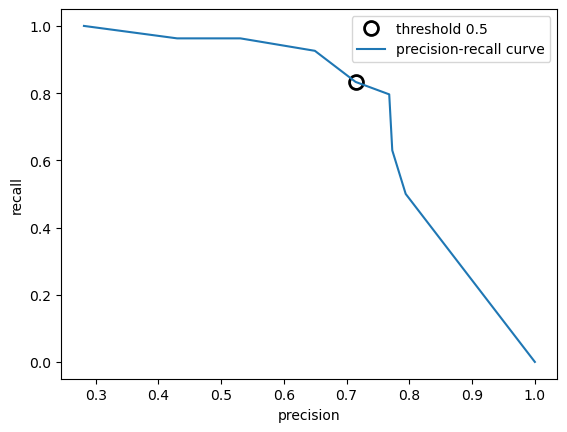

In [21]:
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, tree.predict_proba(X_test)[:,1])
close_default_tree = np.argmin(np.abs(thresholds_tree-0.5))
plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], 'o', 
         markersize=10, label='threshold 0.5', fillstyle='none', c='k', mew=2)

plt.plot(precision_tree, recall_tree, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

ap_tree = average_precision_score(y_test, tree.predict_proba(X_test)[:, 1])
print("Average Precision Score: {:.3f}".format(ap_tree))

### precision_recall_curve?

Compute precision-recall pairs for different probability thresholds.

##### Returns
-------
precision : ndarray of shape (n_thresholds + 1,)
    Precision values such that element i is the precision of
    predictions with score >= thresholds[i] and the last element is 1.

recall : ndarray of shape (n_thresholds + 1,)
    Decreasing recall values such that element i is the recall of
    predictions with score >= thresholds[i] and the last element is 0.

thresholds : ndarray of shape (n_thresholds,)
    Increasing thresholds on the decision function used to compute
    precision and recall where `n_thresholds = len(np.unique(probas_pred))`

In [22]:
np.unique(tree.predict_proba(X_test)[:,1])

array([0.        , 0.06122449, 0.11864407, 0.3       , 0.52631579,
       0.67857143, 0.86206897, 0.91111111])

In [23]:
thresholds_tree

array([0.        , 0.06122449, 0.11864407, 0.3       , 0.52631579,
       0.67857143, 0.86206897, 0.91111111])

In [24]:
np.abs(thresholds_tree-0.5)

array([0.5       , 0.43877551, 0.38135593, 0.2       , 0.02631579,
       0.17857143, 0.36206897, 0.41111111])

In [25]:
np.argmin(np.abs(thresholds_tree-0.5))

4

In [26]:
precision_tree

array([0.28125   , 0.42975207, 0.53061224, 0.64935065, 0.71428571,
       0.76785714, 0.77272727, 0.79411765, 1.        ])

In [27]:
recall_tree

array([1.        , 0.96296296, 0.96296296, 0.92592593, 0.83333333,
       0.7962963 , 0.62962963, 0.5       , 0.        ])

### average_precision_score?

Compute average precision (AP) from prediction scores.

AP summarizes a precision-recall curve as the weighted mean of precisions
achieved at each threshold, with the increase in recall from the previous
threshold used as the weight:

Average Precision Score: 0.742


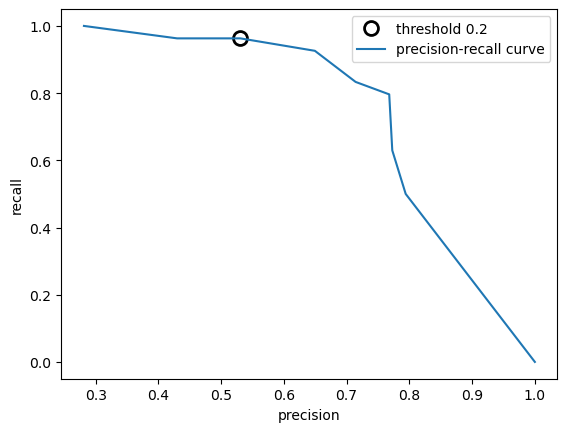

In [28]:
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, tree.predict_proba(X_test)[:,1])
close_default_tree = np.argmin(np.abs(thresholds_tree-0.2))
plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], 'o', 
         markersize=10, label='threshold 0.2', fillstyle='none', c='k', mew=2)

plt.plot(precision_tree, recall_tree, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

ap_tree = average_precision_score(y_test, tree.predict_proba(X_test)[:, 1])
print("Average Precision Score: {:.3f}".format(ap_tree))

Average Precision Score: 0.742


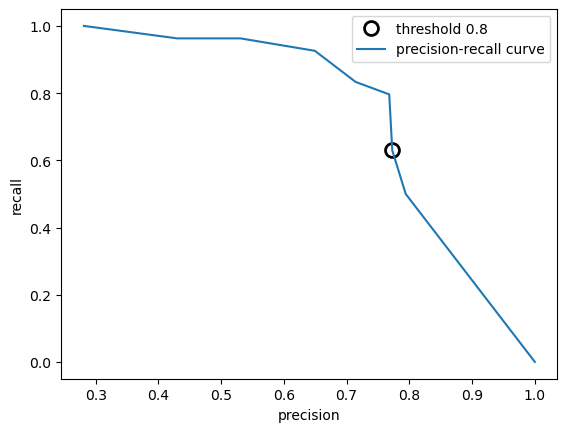

In [29]:
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, tree.predict_proba(X_test)[:,1])
close_default_tree = np.argmin(np.abs(thresholds_tree-0.8))
plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], 'o', 
         markersize=10, label='threshold 0.8', fillstyle='none', c='k', mew=2)

plt.plot(precision_tree, recall_tree, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

ap_tree = average_precision_score(y_test, tree.predict_proba(X_test)[:, 1])
print("Average Precision Score: {:.3f}".format(ap_tree))

Average Precision Score: 0.800


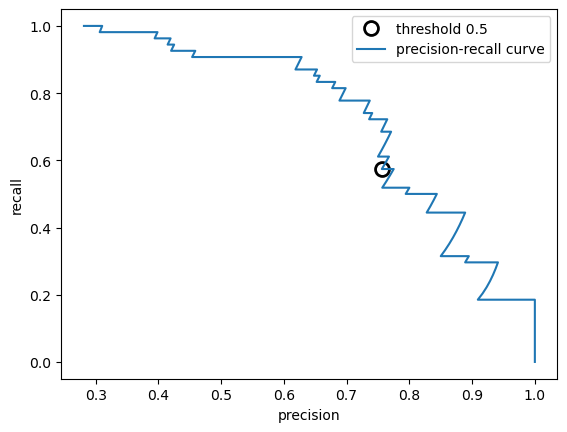

In [30]:
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
close_default_logreg = np.argmin(np.abs(thresholds_logreg-0.5))
plt.plot(precision_logreg[close_default_logreg], recall_logreg[close_default_logreg], 'o', 
         markersize=10, label='threshold 0.5', fillstyle='none', c='k', mew=2)

plt.plot(precision_logreg, recall_logreg, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

log_reg = average_precision_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("Average Precision Score: {:.3f}".format(log_reg))

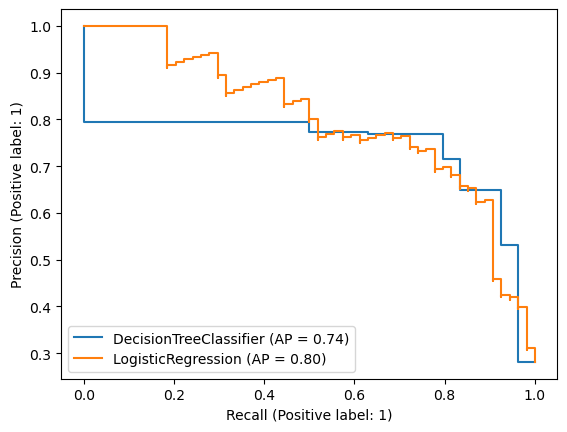

In [31]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_estimator(tree, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test, ax=ax)
plt.show()

In [32]:
PrecisionRecallDisplay?

Init signature:
PrecisionRecallDisplay(
    precision,
    recall,
    *,
    average_precision=None,
    estimator_name=None,
    pos_label=None,
)
Docstring:     
Precision Recall visualization.

It is recommend to use
:func:`~sklearn.metrics.PrecisionRecallDisplay.from_estimator` or
:func:`~sklearn.metrics.PrecisionRecallDisplay.from_predictions` to create
a :class:`~sklearn.metrics.PredictionRecallDisplay`. All parameters are
stored as attributes.

Read more in the :ref:`User Guide <visualizations>`.

Parameters
----------
precision : ndarray
    Precision values.

recall : ndarray
    Recall values.

average_precision : float, default=None
    Average precision. If None, the average precision is not shown.

estimator_name : str, default=None
    Name of estimator. If None, then the estimator name is not shown.

pos_label : str or int, default=None
    The class considered as the positive class. If None, the class will not
    be shown in the legend.

    .. versionadded:: 0.24

At

# ROC and AUC

In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=0)

AUC of RandomForest: 0.928


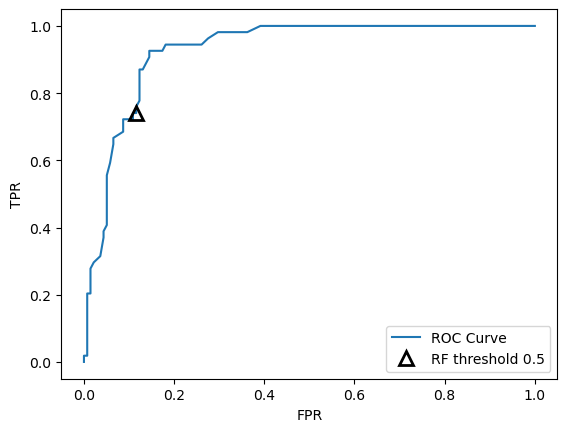

In [34]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr_rf, tpr_rf, label="ROC Curve")

plt.xlabel("FPR")
plt.ylabel("TPR")
close_default_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label="RF threshold 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("AUC of RandomForest: {:.3f}".format(rf_auc))

# Metrics for Multiclass Classification

In [35]:
iris_dataset = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                                    random_state = 0)

In [36]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print("Acciracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Acciracy: 0.868
Confusion Matrix:
 [[13  0  0]
 [ 0 11  5]
 [ 0  0  9]]


In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

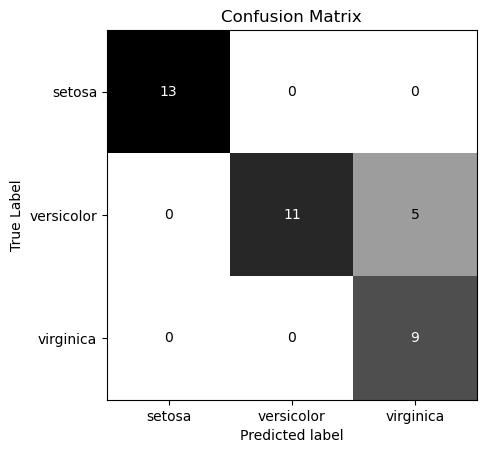

In [37]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True Label', xticklabels=iris_dataset.target_names,
    yticklabels=iris_dataset.target_names, cmap=plt.cm.gray_r, fmt="%d")    

plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

In [38]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.69      0.81        16
           2       0.64      1.00      0.78         9

    accuracy                           0.87        38
   macro avg       0.88      0.90      0.87        38
weighted avg       0.92      0.87      0.87        38



In [39]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


## \[11/20\] Uncertainty Estimation

In [42]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
# usual train_test_split: X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

print(X.shape)
print(X)

(100, 2)
[[-0.37748684 -0.0400769 ]
 [ 0.02701955 -0.48423931]
 [-0.36118825 -1.4007017 ]
 [-0.68154165  0.00577195]
 [ 0.79966997 -0.1374838 ]
 [-0.44067409  0.65738634]
 [-0.51680069 -0.64905973]
 [-0.48984706 -0.07126104]
 [-0.24030273  0.4245925 ]
 [-0.15480597  0.3987051 ]
 [ 0.22202915 -0.56040775]
 [ 0.14845311 -0.83918918]
 [ 0.55447318  0.52619405]
 [ 0.73776469 -0.06026285]
 [ 0.56048402 -0.22169632]
 [-0.24288865 -0.81429088]
 [-1.16124083 -0.74556572]
 [ 0.77723853 -0.37259801]
 [-0.47721837 -0.37664926]
 [ 0.11550395  1.10356127]
 [ 0.58181291  0.19749795]
 [-0.85136464  0.13473314]
 [ 0.47159612 -0.34434378]
 [-0.0609338   0.20718973]
 [-0.72283227  0.43895304]
 [-0.38474582 -1.09366122]
 [ 0.13179551 -0.53591877]
 [-0.93195251 -0.462223  ]
 [ 0.41735023 -0.76677992]
 [-0.08532078 -0.77752591]
 [-0.07320389  0.79692206]
 [ 0.88178468 -0.17459954]
 [-0.00626974 -0.20708197]
 [ 0.15324214 -0.39398671]
 [ 0.16545985 -0.17406719]
 [ 0.33256209 -1.02184884]
 [ 0.86965498 -0.42

In [43]:
print(y)
print(y_named)

[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0]
['red' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'blue' 'red' 'red' 'red' 'blue' 'blue' 'blue' 'red' 'blue' 'blue' 'red'
 'red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red'
 'red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'blue' 'blue' 'red'
 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red'
 'blue' 'red' 'blue' 'red' 'red' 'blue' 'red' 'red' 'blue' 'red' 'blue'
 'red' 'red' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'red' 'blue' 'blue'
 'red' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'blue' 'red' 'blue'
 'blue']


## Decision Function

In [44]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:", gbrt.decision_function(X_test).shape)

# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_test))

print()

print("Thresholded decision function:\n",gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

X_test.shape: (25, 2)
Decision function shape: (25,)
Decision function: [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46255955  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


양수: 양성 클래스일 경향성\
음수: 음성 클래스일 경향성

Decision function minimum: -7.69 maximum: 4.29


C:\Users\nsun5\AppData\Local\Temp\ipykernel_6620\1412437467.py:18: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


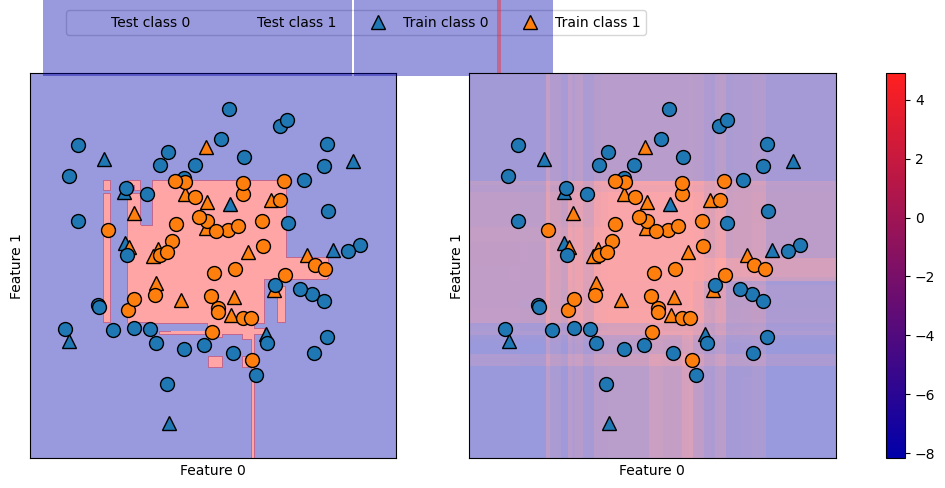

In [46]:
decision_function = gbrt.decision_function(X_test)

print(f"Decision function minimum: {np.min(decision_function):.2f} maximum: {np.max(decision_function):.2f}")

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()

자, 데이터가 이렇게 원형이다.

### k-Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
clf.decision_function(X_test)

AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

kNN은 **그런 거 없다**.

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
print(lr.decision_function(X_test))
print(lr.predict(X_test))
print('Score:', lr.score(X_test, y_test)) # 선형으로는 당연히 점수가 안 나오는 게 정상...

[-0.12828781 -0.22283766 -0.05542228 -0.15126832 -0.17611708 -0.2076426
 -0.15733355 -0.23190331 -0.21367661 -0.17942394 -0.22020005 -0.2096856
 -0.15642411 -0.15503923 -0.20272621 -0.278994   -0.13525138 -0.26656691
 -0.1426137  -0.2458247  -0.22295468 -0.24616374 -0.21859495 -0.30099443
 -0.10040857]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Score: 0.36


### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)
tree.decision_function(X_test)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
rf.decision_function(X_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

## Predicting Probabilities

In [54]:
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)

# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test))

Shape of probabilities: (25, 2)
Predicted probabilities:
[[1.57362639e-02 9.84263736e-01]
 [8.45756526e-01 1.54243474e-01]
 [9.81128693e-01 1.88713075e-02]
 [9.74070327e-01 2.59296728e-02]
 [1.35214212e-02 9.86478579e-01]
 [2.50463747e-02 9.74953625e-01]
 [9.99543275e-01 4.56725221e-04]
 [1.61426376e-02 9.83857362e-01]
 [2.48329911e-01 7.51670089e-01]
 [3.20518935e-02 9.67948107e-01]
 [9.98441637e-01 1.55836338e-03]
 [1.35214212e-02 9.86478579e-01]
 [1.98099245e-02 9.80190075e-01]
 [7.68580365e-01 2.31419635e-01]
 [2.50463747e-02 9.74953625e-01]
 [9.84817480e-01 1.51825198e-02]
 [7.73836215e-01 2.26163785e-01]
 [9.80463909e-01 1.95360915e-02]
 [1.73607896e-02 9.82639210e-01]
 [1.61426376e-02 9.83857362e-01]
 [1.61426376e-02 9.83857362e-01]
 [3.41393574e-01 6.58606426e-01]
 [6.30759509e-02 9.36924049e-01]
 [9.34424749e-01 6.55752512e-02]
 [8.66199569e-01 1.33800431e-01]]


### k-Nearest Neighbors

In [56]:
print(clf.predict_proba(X_test))
print('Train score:', clf.score(X_train, y_train))
print('Test score:', clf.score(X_test, y_test))

[[0.   1.  ]
 [0.25 0.75]
 [1.   0.  ]
 [0.5  0.5 ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.25 0.75]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.25 0.75]
 [0.25 0.75]
 [1.   0.  ]
 [0.5  0.5 ]
 [0.75 0.25]
 [0.   1.  ]
 [0.25 0.75]
 [0.   1.  ]
 [0.75 0.25]
 [0.25 0.75]
 [1.   0.  ]
 [0.25 0.75]]
Train score: 0.8666666666666667
Test score: 0.76


이 점수 차이는 오버피팅 문제가 아니라 그냥 알고리즘 자체 한계일수도...

### Random Forest

In [57]:
rf = RandomForestClassifier().fit(X_train, y_train)
print(rf.predict_proba(X_test))
print('Train score:', rf.score(X_train, y_train))
print('Test score:', rf.score(X_test, y_test))

[[0.07 0.93]
 [0.76 0.24]
 [0.83 0.17]
 [0.8  0.2 ]
 [0.01 0.99]
 [0.14 0.86]
 [1.   0.  ]
 [0.03 0.97]
 [0.16 0.84]
 [0.24 0.76]
 [1.   0.  ]
 [0.02 0.98]
 [0.17 0.83]
 [0.55 0.45]
 [0.1  0.9 ]
 [0.94 0.06]
 [0.72 0.28]
 [0.89 0.11]
 [0.08 0.92]
 [0.12 0.88]
 [0.02 0.98]
 [0.49 0.51]
 [0.42 0.58]
 [0.88 0.12]
 [0.64 0.36]]
Train score: 1.0
Test score: 0.84


### Logistic Regression

In [58]:
print(lr.predict_proba(X_test))
print('Train score:', lr.score(X_train, y_train))
print('Test score:', lr.score(X_test, y_test))

[[0.53202804 0.46797196]
 [0.55548003 0.44451997]
 [0.51385202 0.48614798]
 [0.53774513 0.46225487]
 [0.54391582 0.45608418]
 [0.55172494 0.44827506]
 [0.53925245 0.46074755]
 [0.55771739 0.44228261]
 [0.55321683 0.44678317]
 [0.54473603 0.45526397]
 [0.55482865 0.44517135]
 [0.55223017 0.44776983]
 [0.53902648 0.46097352]
 [0.53868235 0.46131765]
 [0.55050869 0.44949131]
 [0.56929957 0.43070043]
 [0.5337614  0.4662386 ]
 [0.56624989 0.43375011]
 [0.53559312 0.46440688]
 [0.56114855 0.43885145]
 [0.55550892 0.44449108]
 [0.56123204 0.43876796]
 [0.55443216 0.44556784]
 [0.5746856  0.4253144 ]
 [0.52508107 0.47491893]]
Train score: 0.5466666666666666
Test score: 0.36


### Decision Tree

In [61]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

print(tree.predict_proba(X_test))
print('train score:',tree.score(X_train, y_train))
print('test score:',tree.score(X_test, y_test))

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
train score: 1.0
test score: 0.84


In [62]:
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)

print(tree.predict_proba(X_test))
print('train score:',tree.score(X_train, y_train))
print('test score:',tree.score(X_test, y_test))

[[0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [1.         0.        ]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [1.         0.        ]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [0.44262295 0.55737705]
 [1.         0.        ]
 [0.44262295 0.55737705]]
train score: 0.64
test score: 0.68


## Classification threshold settings with ```predict_proba```

In [63]:
rf.predict_proba(X_test)

array([[0.07, 0.93],
       [0.76, 0.24],
       [0.83, 0.17],
       [0.8 , 0.2 ],
       [0.01, 0.99],
       [0.14, 0.86],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.16, 0.84],
       [0.24, 0.76],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.17, 0.83],
       [0.55, 0.45],
       [0.1 , 0.9 ],
       [0.94, 0.06],
       [0.72, 0.28],
       [0.89, 0.11],
       [0.08, 0.92],
       [0.12, 0.88],
       [0.02, 0.98],
       [0.49, 0.51],
       [0.42, 0.58],
       [0.88, 0.12],
       [0.64, 0.36]])

Average Precision Score: 0.860


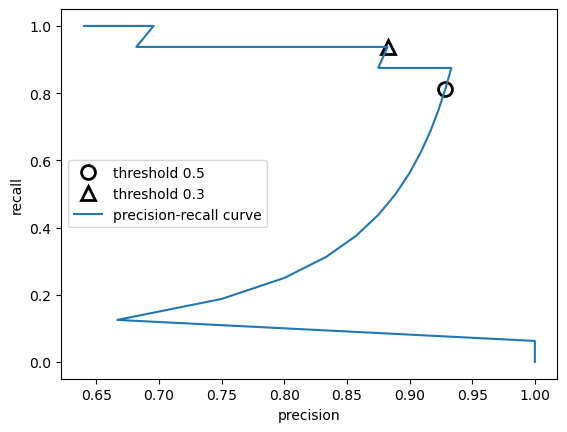

In [64]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
close_default = np.argmin(np.abs(thresholds-0.5))
plt.plot(precision[close_default], recall[close_default], 'o', 
         markersize=10, label='threshold 0.5', fillstyle='none', c='k', mew=2)
close_default = np.argmin(np.abs(thresholds-0.3))
plt.plot(precision[close_default], recall[close_default], '^', 
         markersize=10, label='threshold 0.3', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
print(f"Average Precision Score: {ap_rf:.3f}")

**실제로 threshold를 바꾸는 부분**

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

threshold = 0.3

predicted_proba = rf.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print('threshold 0.5 accuracy:',accuracy_score(y_test, rf.predict(X_test)))
print('threshold 0.3 accuracy:',accuracy_score(y_test, predicted))
print('threshold 0.5 precision:',precision_score(y_test, rf.predict(X_test)))
print('threshold 0.3 precision:',accuracy_score(y_test, predicted))
print('threshold 0.5 recall:', recall_score(y_test, rf.predict(X_test)))
print('threshold 0.3 recall:',accuracy_score(y_test, predicted))

threshold 0.5 accuracy: 0.84
threshold 0.3 accuracy: 0.84
threshold 0.5 precision: 0.9285714285714286
threshold 0.3 precision: 0.84
threshold 0.5 recall: 0.8125
threshold 0.3 recall: 0.84


In [66]:
print(predicted_proba[:, 1])
print(predicted)

[0.93 0.24 0.17 0.2  0.99 0.86 0.   0.97 0.84 0.76 0.   0.98 0.83 0.45
 0.9  0.06 0.28 0.11 0.92 0.88 0.98 0.51 0.58 0.12 0.36]
[1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1]


## Uncertainty in multiclass classification

In [67]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [68]:
print("Decision function shape:", gbrt.decision_function(X_test).shape)
print("Decision function:")
print(gbrt.decision_function(X_test))

Decision function shape: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99677434 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99677434 -1.87637861  0.07863156]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99087515 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99087515 -1.87637861  0.09686725]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99730159 -1.86429671  0.04166049]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99087515 -1.87637861  0.09686725]
 [-1.9908751

In [69]:
print("Argmax of decision function:")
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [70]:
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test))
# show that sums across rows are one
print("Sums:", gbrt.predict_proba(X_test).sum(axis=1))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]
 [0.10217718 0.78840034 0.10942248]
 [0.09763381 0.11012538 0.79224081]
 [0.10217718 0.78840034 0.10942248]
 [0.10217718 0.78840034 0.10942248]
 [0.09905185 0.11172485 0.78922331]
 [0.78347147 0.10936745 0.10716108]
 [0.78347147 0.10936745 0.10716108]
 [0.78347147 0.10936745 0.10716108]
 [0.78347147 0.10936745 0.10716108]
 [0.10217718 0.78840034 0.10942248]
 [0.09815477 0.1100618  0.79178343]
 [0.10217718 0.78840034 0.10942248]
 [0.10217718 0.78840034 0.10942248]
 [0.09815477 0.1100618  0.79178343]
 [0.78347147 0.10936745 0.10716108]
 [0.10178234 0.11626145 0.78195621]
 [0.78347147 0.10936745 0.10716108]
 [0.09815477 0.1100618  0.79178343]
 [0.09957954 0.11165941 0.78876105]
 [0.09815477 0.1100618  0.79178343]
 [0.09818072 0.11005864 0.79176065]
 [0

In [71]:
print("Argmax of predicted probabilities:")
print(np.argmax(gbrt.predict_proba(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
